---
<h1 style="text-align:center;"> Fashion MNIST</h1>

---

Dataset Information:

Fashion-MNIST is a dataset consisting of images of Zalando's articles. The dataset serves as a replacement for the original MNIST dataset and includes a training set of 60,000 examples and a test set of 10,000 examples. Each image is a grayscale 28x28 pixel image, associated with a label from 10 different classes. The goal is to provide a benchmark for machine learning algorithms, maintaining the same image size and structure as the original MNIST dataset.

Original MNIST dataset, known for handwritten digits, is widely used in the AI/ML/Data Science community for algorithm validation. The popularity stems from the belief that "If it doesn't work on MNIST, it won't work at all" and, conversely, "If it works on MNIST, it may still fail on others."

Zalando aims to replace the original MNIST dataset with Fashion-MNIST.

Dataset Details:
- Each image has dimensions of 28 pixels in height and 28 pixels in width, totaling 784 pixels.
- Pixel values range from 0 to 255, indicating the lightness or darkness of the pixel, with higher values indicating darker pixels.
- The dataset contains 785 columns, with the first column representing the class labels (clothing types), and the remaining columns containing pixel-values of the associated images.

Pixel Location:
- To locate a pixel in the image, use the formula x = i * 28 + j, where i and j are integers between 0 and 27. This formula represents the position of the pixel in a 28x28 matrix.

Labels:
- Each training and test example is labeled with one of the following classes:
  - 0: T-shirt/top
  - 1: Trouser
  - 2: Pullover
  - 3: Dress
  - 4: Coat
  - 5: Sandal
  - 6: Shirt
  - 7: Sneaker
  - 8: Bag
  - 9: Ankle boot

Summary:
- Each row in the dataset represents a separate image.
- Column 1 contains the class label.
- The remaining columns represent pixel numbers (784 total).
- Each value in the dataset corresponds to the darkness of the pixel, ranging from 1 to 255.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
train_data = pd.read_csv('fashion-mnist_train.csv')

In [3]:
test_data = pd.read_csv('fashion-mnist_test.csv')

In [4]:
# info from kaggle
classes = 10
labels = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

In [5]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(f'The training dataset has {train_data.shape[0]} rows and {train_data.shape[1]} columns and {train_data.isna().sum().sum()} null values')
print(f'The testin datatset has {test_data.shape[0]} rows and {test_data.shape[1]} columns {test_data.isna().sum().sum()} null values')

The training dataset has 60000 rows and 785 columns and 0 null values
The testin datatset has 10000 rows and 785 columns 0 null values


In [7]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


In [9]:
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [10]:
# types of the data
print(train_data.dtypes)
print('\n' +'-'*30 + '\n')
print(test_data.dtypes)

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

------------------------------

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object


In [11]:
print(train_data['label'].value_counts())
print('\n' + '-'*30 + '\n')
print(test_data['label'].value_counts())

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

------------------------------

label
0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: count, dtype: int64


We see that the classes are symmetrical

In [33]:
# make the numpy arrays
np_train = train_data.values
np_test = test_data.values

In [34]:
# split our data to X and y
X_train = train_data.drop("label", axis=1).values
y_train = train_data["label"].values
X_test = test_data.drop("label", axis=1).values
y_test = test_data["label"].values

In [35]:
# reshape the data to 28x28 for plotting
X_train_plot = X_train.reshape(-1,28,28)
X_test_plot = X_test.reshape(-1,28,28)

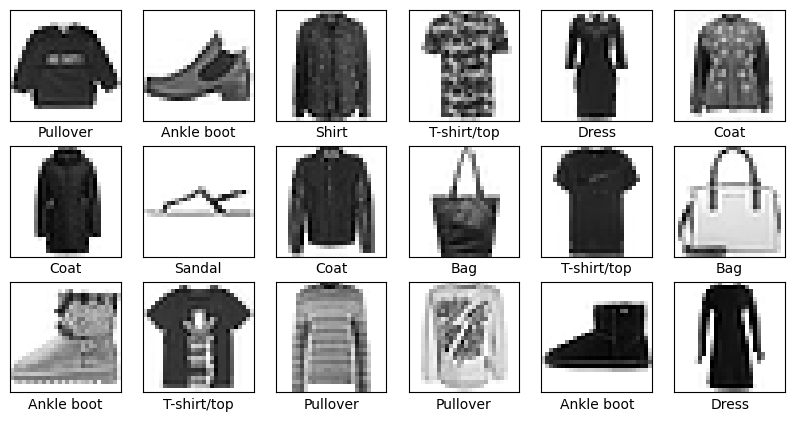

In [39]:
#plot first few images
plt.figure(figsize=(10,5))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_plot[i], cmap = plt.cm.binary)
    plt.xlabel(labels[y_train[i]])
plt.show()

In [40]:
# convert from integers to floats
X_train = X_train.astype('float')
X_test = X_test.astype('float')

#normalising the data
X_train /= 255 
X_test /= 255

In [27]:
# in order to plot we need to endoce the data to one hot encoding
# the encoder requires the labels to be in one hot encoded format
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

# initialize the encoder
encoder = OneHotEncoder(sparse_output=False, categories='auto')

y_train_one_hot = encoder.fit_transform(y_train_reshaped)
y_test_one_hot = encoder.transform(y_test_reshaped)

In [18]:
y_test_one_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

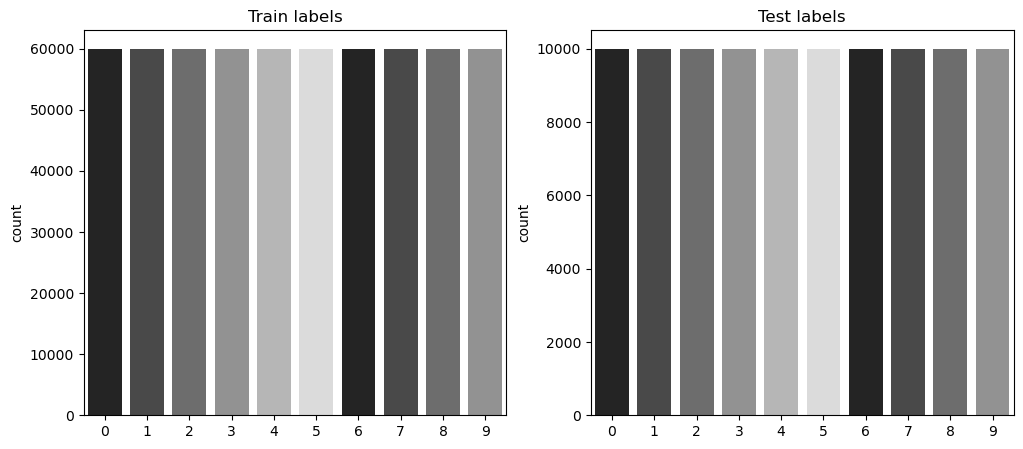

In [19]:
# Set a color palette
palette = sns.color_palette("gray")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(y_train_one_hot, palette=palette)
plt.title('Train labels')
plt.subplot(1, 2, 2)
sns.countplot(y_test_one_hot, palette=palette)
plt.title('Test labels')
plt.show()

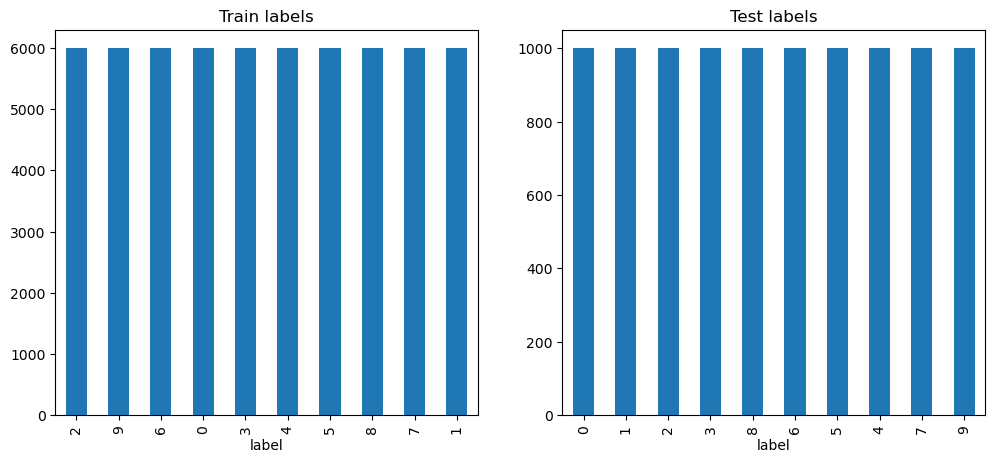

In [32]:
# Plot the distribution of the labels
palette = sns.color_palette("gray")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data['label'].value_counts().plot(kind='bar')
plt.title('Train labels')
plt.subplot(1, 2, 2)
test_data['label'].value_counts().plot(kind='bar')
plt.title('Test labels')
plt.show()

As we saw before the labels are symetrical

---
<h3 style="text-align:center;"> Models</h3>

---

In [20]:
# reshape the data for training
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [45]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

dt_classification_report = classification_report(y_test, dt_predictions)
print(dt_classification_report)

Decision Tree Accuracy: 0.7977
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1000
           1       0.95      0.97      0.96      1000
           2       0.70      0.67      0.68      1000
           3       0.82      0.80      0.81      1000
           4       0.67      0.69      0.68      1000
           5       0.90      0.87      0.88      1000
           6       0.56      0.56      0.56      1000
           7       0.86      0.85      0.86      1000
           8       0.91      0.91      0.91      1000
           9       0.89      0.90      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [50]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

lr_classification_report = classification_report(y_test, lr_predictions)
print(lr_classification_report)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.97      0.97      0.97      1000
           2       0.77      0.76      0.76      1000
           3       0.86      0.89      0.87      1000
           4       0.78      0.81      0.79      1000
           5       0.93      0.92      0.92      1000
           6       0.66      0.60      0.63      1000
           7       0.91      0.91      0.91      1000
           8       0.94      0.95      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.86     10000
weighted avg       0.85      0.86      0.86     10000



/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

svm_report = classification_report(y_test, svm_predictions)
print(svm_report)

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1000
           1       0.95      0.97      0.96      1000
           2       0.70      0.67      0.68      1000
           3       0.82      0.80      0.81      1000
           4       0.67      0.69      0.68      1000
           5       0.90      0.87      0.88      1000
           6       0.56      0.56      0.56      1000
           7       0.86      0.85      0.86      1000
           8       0.91      0.91      0.91      1000
           9       0.89      0.90      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [56]:
# random forest 
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

rf_report = classification_report(y_test, rf_predictions)
print(rf_report)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.89      0.93      0.91      1000
           4       0.80      0.87      0.84      1000
           5       0.97      0.95      0.96      1000
           6       0.74      0.59      0.66      1000
           7       0.92      0.93      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [53]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

xgb_report = classification_report(y_test, xgb_predictions)
print(xgb_report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.83      0.84      1000
           3       0.92      0.93      0.92      1000
           4       0.85      0.88      0.87      1000
           5       0.99      0.96      0.98      1000
           6       0.75      0.71      0.73      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



So we can use the random forest for speed or the xgboost for additional accuracy

In [ ]:
# random forest 
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [ ]:
train_data.train_test_split(X_train_train, )

In [58]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])